# Week 2 - Preprocessing, part 2

# 1. Lesson: None

# 2. Weekly graph question

The Storytelling With Data book mentions planning on a "Who, What, and How" for your data story.  Write down a possible Who, What, and How for your data, using the ideas in the book.

Who:

My audience could be Healthcare policymakers, or Insurance companies, or Employers & HR professionals, or Researchers & analysts,  business managers interested in understanding insights into the trends and patterns of employer-sponsored health insurance (ESI) coverage among private-sector workers in the United States.


What:

I could highlight trends in employer-sponsored health insurance over time and
show differences in coverage across demographics (e.g., gender, race, education level). As well as, identify patterns in how economic shifts or policy changes affect coverage rates.


How:

I can use line charts to show trends over time, bar charts to compare coverage across different demographics, heatmaps to show geographical variations in coverage, annotated points to highlight major policy changes or economic events affecting coverage, and pie chart to show the distribution or composition of a variables at a glance.


# 3. Homework - work with your own data

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

This week, you will do the same types of exercises as last week, but you should use your own datasets that you found last semester.

### Here are some types of analysis you can do  Use Google, documentation, and ChatGPT to help you:

- Summarize the datasets using info() and describe()

- Are there any duplicate rows?

- Are there any duplicate values in a given column (when this would be inappropriate?)

- What are the mean, median, and mode of each column?

- Are there any missing or null values?

    - Do you want to fill in the missing value with a mean value?  A value of your choice?  Remove that row?

- Identify any other inconsistent data (e.g. someone seems to be taking an action before they are born.)

- Encode any categorical variables (e.g. with one-hot encoding.)

### Conclusions:

- Are the data usable?  If not, find some new data!

- Do you need to modify or correct the data in some way?

- Is there any class imbalance?  (Categories that have many more items than other categories).

In [ ]:
df_health = pd.read_csv("/workspaces/2025-spring-B2/health_insurance_coverage.csv")
df_health.head(10)

,year,all,white,black,hispanic,men,white_men,black_men,hispanic_men,women,white_women,black_women,hispanic_women,high_school,bachelors_degree,recent_high-school_graduate,recent_college_graduate
0,2019,53.8,58.0,52.6,41.4,56.8,62.0,53.8,42.4,50.4,53.2,51.5,40.0,46.9,63.2,16.3,37.0
1,2018,52.6,56.8,51.1,39.8,55.1,60.2,51.8,40.9,49.6,52.6,50.4,38.3,46.0,62.5,14.3,41.6
2,2017,54.0,57.3,52.1,43.0,57.1,61.4,53.6,44.4,50.2,52.4,50.8,41.1,47.6,64.1,15.8,37.0
3,2016,53.1,56.7,51.2,41.6,56.6,60.8,52.2,44.2,49.0,51.8,50.3,38.1,47.9,62.8,15.6,34.1
4,2015,52.7,56.3,50.0,41.2,55.9,60.5,51.0,42.6,48.8,51.3,49.1,39.2,47.1,63.5,17.5,36.8
5,2014,52.8,56.9,50.8,39.3,56.3,61.7,53.3,40.2,48.6,51.2,48.5,38.1,47.4,63.3,15.4,40.1
6,2013,52.7,57.1,50.0,37.3,55.5,61.6,50.1,36.7,49.3,51.9,50.0,38.4,47.7,64.3,17.0,45.1
7,2012,51.6,56.3,48.5,35.6,54.2,60.4,47.8,35.2,48.6,51.5,49.1,36.2,45.2,64.5,12.3,38.3
8,2011,52.3,56.9,50.0,35.8,55.4,61.5,50.3,35.5,48.6,51.5,49.7,36.1,46.9,65.0,13.2,38.1
9,2010,53.1,57.8,49.5,36.5,55.8,62.5,48.9,34.9,49.9,52.3,50.0,39.0,47.9,66.4,11.8,48.9


In [ ]:
df_health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   year                         41 non-null     int64  
 1   all                          41 non-null     float64
 2   white                        41 non-null     float64
 3   black                        41 non-null     float64
 4   hispanic                     41 non-null     float64
 5   men                          41 non-null     float64
 6   white_men                    41 non-null     float64
 7   black_men                    41 non-null     float64
 8   hispanic_men                 41 non-null     float64
 9   women                        41 non-null     float64
 10  white_women                  41 non-null     float64
 11  black_women                  41 non-null     float64
 12  hispanic_women               41 non-null     float64
 13  high_school           

In [ ]:
df_health.describe()

,year,all,white,black,hispanic,men,white_men,black_men,hispanic_men,women,white_women,black_women,hispanic_women,high_school,bachelors_degree,recent_high-school_graduate,recent_college_graduate
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,34.000000,34.000000
mean,1999.000000,58.829268,62.036585,54.885366,44.363415,63.002439,67.490244,56.053659,44.958537,53.539024,55.185366,53.648780,43.412195,55.848780,71.156098,22.547059,54.170588
std,11.979149,5.612898,4.559592,4.779151,7.898600,6.775230,5.473016,5.799616,8.904380,3.857776,3.050702,3.730022,6.386752,7.599182,5.686697,7.590274,11.024835
min,1979.000000,51.600000,56.300000,48.500000,35.600000,54.200000,60.200000,47.800000,34.900000,48.600000,51.200000,48.500000,36.100000,45.200000,62.500000,11.800000,34.100000
25%,1989.000000,54.000000,58.200000,52.100000,39.400000,57.100000,62.700000,52.700000,39.300000,50.400000,53.200000,50.800000,39.300000,48.400000,66.500000,16.450000,45.825000
50%,1999.000000,58.300000,61.700000,53.900000,41.600000,62.600000,67.100000,53.900000,42.300000,53.000000,54.600000,52.800000,40.800000,55.600000,71.600000,21.900000,57.250000
75%,2009.000000,61.500000,64.000000,55.700000,46.000000,66.700000,70.400000,56.800000,45.800000,54.800000,55.700000,54.900000,44.700000,60.700000,75.000000,26.475000,61.625000
max,2019.000000,70.500000,71.800000,65.500000,62.200000,77.100000,78.900000,69.000000,66.600000,61.300000,61.700000,62.700000,59.300000,70.700000,81.500000,43.100000,72.100000


In [ ]:
df_health.duplicated().sum()

np.int64(0)

In [ ]:
df_health.mean()

year                           1999.000000
all                              58.829268
white                            62.036585
black                            54.885366
hispanic                         44.363415
men                              63.002439
white_men                        67.490244
black_men                        56.053659
hispanic_men                     44.958537
women                            53.539024
white_women                      55.185366
black_women                      53.648780
hispanic_women                   43.412195
high_school                      55.848780
bachelors_degree                 71.156098
recent_high-school_graduate      22.547059
recent_college_graduate          54.170588
dtype: float64

In [ ]:
df_health.median()

year                           1999.00
all                              58.30
white                            61.70
black                            53.90
hispanic                         41.60
men                              62.60
white_men                        67.10
black_men                        53.90
hispanic_men                     42.30
women                            53.00
white_women                      54.60
black_women                      52.80
hispanic_women                   40.80
high_school                      55.60
bachelors_degree                 71.60
recent_high-school_graduate      21.90
recent_college_graduate          57.25
dtype: float64

In [ ]:
df_health.mode().iloc[0]

year                           1979.0
all                              58.9
white                            61.2
black                            50.0
hispanic                         41.2
men                              58.4
white_men                        67.0
black_men                        56.1
hispanic_men                     42.3
women                            48.6
white_women                      55.0
black_women                      50.0
hispanic_women                   38.1
high_school                      56.2
bachelors_degree                 68.8
recent_high-school_graduate      19.9
recent_college_graduate          37.0
Name: 0, dtype: float64

In [ ]:
df_health.isnull().sum()

year                           0
all                            0
white                          0
black                          0
hispanic                       0
men                            0
white_men                      0
black_men                      0
hispanic_men                   0
women                          0
white_women                    0
black_women                    0
hispanic_women                 0
high_school                    0
bachelors_degree               0
recent_high-school_graduate    7
recent_college_graduate        7
dtype: int64

In [ ]:
df_health.dropna(inplace=True) # removing the missing value rows won't affect result significantly only if the dataset is large

In [ ]:
df_health.isnull().sum()

year                           0
all                            0
white                          0
black                          0
hispanic                       0
men                            0
white_men                      0
black_men                      0
hispanic_men                   0
women                          0
white_women                    0
black_women                    0
hispanic_women                 0
high_school                    0
bachelors_degree               0
recent_high-school_graduate    0
recent_college_graduate        0
dtype: int64

In [ ]:
Q1 = df_health.quantile(0.25)
Q3 = df_health.quantile(0.75)
IQR = Q3 - Q1
outliers = ((df_health < (Q1 - 1.5 * IQR)) | (df_health > (Q3 + 1.5 * IQR)))
print(outliers.sum())

year                           0
all                            0
white                          0
black                          1
hispanic                       1
men                            0
white_men                      0
black_men                      1
hispanic_men                   1
women                          1
white_women                    1
black_women                    0
hispanic_women                 3
high_school                    0
bachelors_degree               0
recent_high-school_graduate    1
recent_college_graduate        0
dtype: int64


In [ ]:
print(df_health['all'].unique())

[53.8 52.6 54.  53.1 52.7 52.8 51.6 52.3 53.6 55.2 55.4 55.  54.9 55.9
 56.4 57.3 58.2 58.9 58.7 58.  59.1 58.5 58.3 59.7 59.9 61.5 61.7 62.4
 66.2]


Conclusions:

The dataset consists of 41 rows and 17 columns related to employer-sponsored health insurance coverage.
Data types include float64 (16 columns) and int64 (1 column - year).
Some columns represent different demographic groups, such as race (white, black, hispanic), gender (men, women), and education level.

Data Usability:

The dataset is mostly clean and usable, but it has few missing values. The missing values were handled by removing the rows.
Using Interquartile Range (IQR), I identified some potential outliers in the Black, Hispanic, Black Men, Hispanic Men, Women, White Women, Hispanic Women, Recent High-School Graduates columns.
These may represent significant variations in coverage due to policy changes, economic shifts, or data entry errors.

Potential Modifications:

To handle missing values the rows were removed.
The identified outliers in the dataset require further investigation to determine their validity. These outliers could represent genuine variations in the data or potential errors. To make an informed decision on whether to retain or remove them, additional domain knowledge and context regarding the dataset are necessary. Without this information, it is not advisable to remove the outliers prematurely, as they may hold valuable insights.

⚖ Class Imbalance Check:

The dataset does not appear to have a significant class imbalance, as the categories represent continuous percentages rather than distinct classes.

# 4. Storytelling With Data graph

Just like last week: choose any graph in the Introduction of Storytelling With Data. Use matplotlib to reproduce it in a rough way. I don't expect you to spend an enormous amount of time on this; I understand that you likely will not have time to re-create every feature of the graph. However, if you're excited about learning to use matplotlib, this is a good way to do that. You don't have to duplicate the exact values on the graph; just the same rough shape will be enough.  If you don't feel comfortable using matplotlib yet, do the best you can and write down what you tried or what Google searches you did to find the answers.

In [ ]:
import matplotlib.pyplot as plt

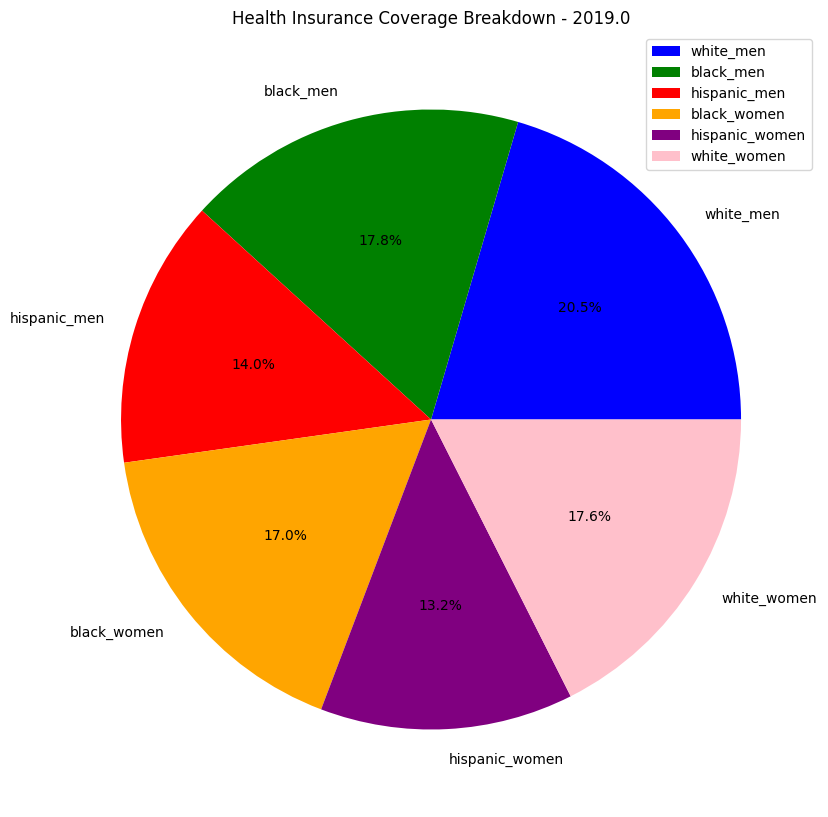

In [ ]:
latest_year_data = df_health.iloc[0]
year = latest_year_data['year']

categories = ['white_men',  'black_men', 'hispanic_men', 'black_women', 'hispanic_women', 'white_women' ]
values = latest_year_data[categories].values

plt.figure(figsize=(10, 12))
plt.pie(values, labels=categories, autopct='%1.1f%%', colors=['blue', 'green', 'red', 'orange', 'purple', 'pink'])
plt.title(f'Health Insurance Coverage Breakdown - {year}')
plt.legend()


I looked at the book's introduction page to explore different types of graphs. While I was familiar with some, I didn't know how to draw few of them in Python until today. I learned how to create a pie chart and understand the distribution or composition of a variables at a glance. To ensure my understanding, I searched for help on ChatGPT and Google. I then made some adjustments to the inputs to verify my grasp of the concept.